In [1]:
import sys

if ".." not in sys.path:
    sys.path.append("..")

In [2]:
import matplotlib.pyplot as plt
import pickle

from utils.math import get_interpolator
from utils.colors import *

DATA_FILE = "../data/clean/CUE2/dFBA.pkl"

# Load condition data
with open(DATA_FILE, "rb") as f:
    data = pickle.load(f)

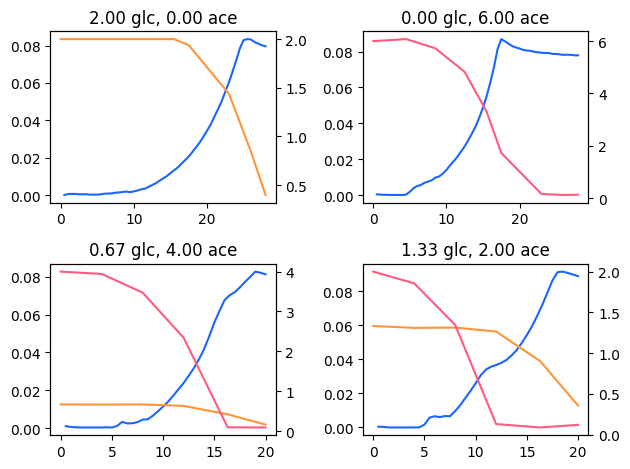

In [3]:
fig, axs = plt.subplots(2, 2)

for ax, ((glucose, acetate), dat) in zip(axs.flat, data.items()):
    b_t = dat["mean"]["b_t"]
    g_t = dat["mean"]["g_t"].values
    a_t = dat["mean"]["a_t"].values
    b_s = dat["mean"]["b_s"]
    g_s = dat["mean"]["g_s"]
    a_s = dat["mean"]["a_s"]
    
    tmax = min(b_t[-1], g_t[-1], a_t[-1])

    ax.plot(b_t[b_t <= tmax], b_s[b_t <= tmax], color=C_BIOMASS)
    ax2 = ax.twinx()
    ax2.plot(g_t[g_t <= tmax], g_s[g_t <= tmax], color=C_GLUCOSE)
    ax2.plot(a_t[a_t <= tmax], a_s[a_t <= tmax], color=C_ACETATE)

    ax.set_title(f"{glucose.magnitude:.2f} glc, {acetate.magnitude:.2f} ace")

fig.tight_layout()

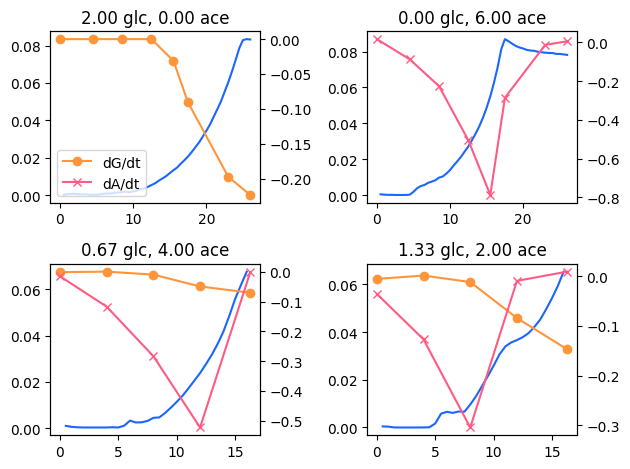

In [4]:
# Plot dS/dt
fig, axs = plt.subplots(2, 2)

for ax, ((glucose, acetate), dat) in zip(axs.flat, data.items()):
    b_t = dat["mean"]["b_t"]
    g_t = dat["mean"]["g_t"].values
    a_t = dat["mean"]["a_t"].values
    b_s = dat["mean"]["b_s"]
    g_s = dat["mean"]["g_s"]
    a_s = dat["mean"]["a_s"]

    dg_dt = np.diff(g_s) / np.diff(g_t)
    da_dt = np.diff(a_s) / np.diff(a_t)
    g_t = g_t[:-1]
    a_t = a_t[:-1]
    
    tmax = min(b_t[-1], g_t[-1], a_t[-1])

    ax.plot(b_t[b_t <= tmax], b_s[b_t <= tmax], color=C_BIOMASS)
    ax2 = ax.twinx()
    ax2.plot(g_t[g_t <= tmax], dg_dt[g_t <= tmax], label="dG/dt", color=C_GLUCOSE, marker="o")
    ax2.plot(a_t[a_t <= tmax], da_dt[a_t <= tmax], label="dA/dt", color=C_ACETATE, marker="x")

    ax.set_title(f"{glucose.magnitude:.2f} glc, {acetate.magnitude:.2f} ace")

    if ax == axs[0, 0]:
        ax2.legend()

fig.tight_layout()

AttributeError: module 'numpy' has no attribute 'concat'

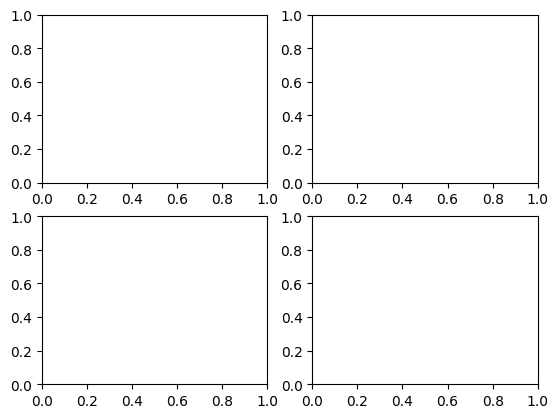

In [5]:
# Plot dS/dt normalized by biomass
fig, axs = plt.subplots(2, 2)

for ax, ((glucose, acetate), dat) in zip(axs.flat, data.items()):
    b_t = dat["mean"]["b_t"]
    b_t = np.concat([[0], b_t])
    g_t = dat["mean"]["g_t"].values
    a_t = dat["mean"]["a_t"].values
    b_s = dat["mean"]["b_s"]
    b_s = np.concat([[b_s[0]], b_s])

    g_s = dat["mean"]["g_s"]
    a_s = dat["mean"]["a_s"]

    dg_dt = -np.diff(g_s) / np.diff(g_t)
    da_dt = -np.diff(a_s) / np.diff(a_t)
    
    tmax = min(b_t[-1], g_t[-1], a_t[-1])
    g_t = g_t[g_t <= tmax][:-1]
    a_t = a_t[a_t <= tmax][:-1]
    
    ax2 = ax  #.twinx()
    b_interp = get_interpolator(b_t, b_s)
    ax2.plot(g_t, dg_dt / b_interp(g_t), label="$V_{{glc}}$", color=C_GLUCOSE, marker="o")
    ax2.plot(a_t, da_dt / b_interp(a_t), label="$V_{{ace}}$", color=C_ACETATE, marker="x")

    ax.set_yscale("log")
    ax.set_title(f"{glucose.magnitude:.2f} glc, {acetate.magnitude:.2f} ace")

    if ax == axs[0, 0]:
        ax2.legend()

fig.tight_layout()

/tmp/ipykernel_28422/4219045713.py:24: RuntimeWarning: invalid value encountered in divide
  ax2.scatter(g_s[:,:-1], dg_dt / b_interp(g_t), label="$V_{{glc}}$", color=C_GLUCOSE, marker="o")
/tmp/ipykernel_28422/4219045713.py:25: RuntimeWarning: divide by zero encountered in divide
  ax2.scatter(a_s[:,:-1], da_dt / b_interp(a_t), label="$V_{{ace}}$", color=C_ACETATE, marker="x")
/tmp/ipykernel_28422/4219045713.py:24: RuntimeWarning: divide by zero encountered in divide
  ax2.scatter(g_s[:,:-1], dg_dt / b_interp(g_t), label="$V_{{glc}}$", color=C_GLUCOSE, marker="o")


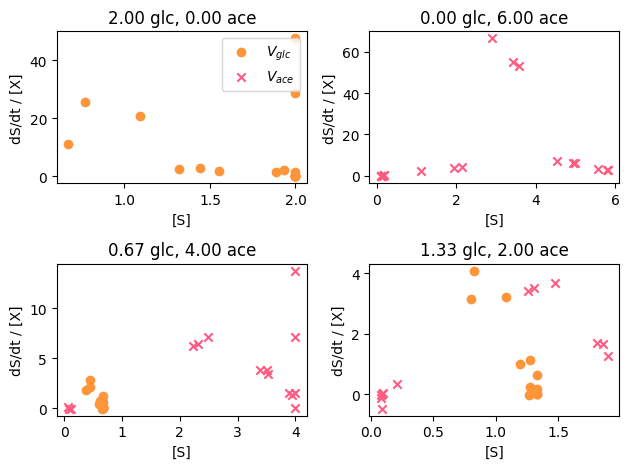

In [15]:
# Plot dS/dt normalized by biomass
fig, axs = plt.subplots(2, 2)

for ax, ((glucose, acetate), dat) in zip(axs.flat, data.items()):
    b_t = dat["raw"]["raw_b_t"]
    b_t = np.concatenate([[0], b_t])
    g_t = dat["raw"]["raw_g_t"].values
    a_t = dat["raw"]["raw_a_t"].values
    b_s = dat["raw"]["raw_b"]
    b_s = np.concatenate([b_s[:,0,np.newaxis], b_s], axis=1)

    g_s = dat["raw"]["raw_g_s"]
    a_s = dat["raw"]["raw_a_s"]

    dg_dt = -np.diff(g_s) / np.diff(g_t)
    da_dt = -np.diff(a_s) / np.diff(a_t)
    
    tmax = min(b_t[-1], g_t[-1], a_t[-1])
    g_t = g_t[g_t <= tmax][:-1]
    a_t = a_t[a_t <= tmax][:-1]
    
    ax2 = ax  #.twinx()
    b_interp = get_interpolator(np.repeat(b_t, 6), np.array(b_s.flat))
    ax2.scatter(g_s[:,:-1], dg_dt / b_interp(g_t), label="$V_{{glc}}$", color=C_GLUCOSE, marker="o")
    ax2.scatter(a_s[:,:-1], da_dt / b_interp(a_t), label="$V_{{ace}}$", color=C_ACETATE, marker="x")

    ax.set_title(f"{glucose.magnitude:.2f} glc, {acetate.magnitude:.2f} ace")
    ax.set_xlabel("[S]")
    ax.set_ylabel("dS/dt / [X]")

    if ax == axs[0, 0]:
        ax2.legend()

fig.tight_layout()

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [q_s, sigma]


/home/mica/.pyenv/versions/3.12.1/envs/rpom/lib/python3.12/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 4 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


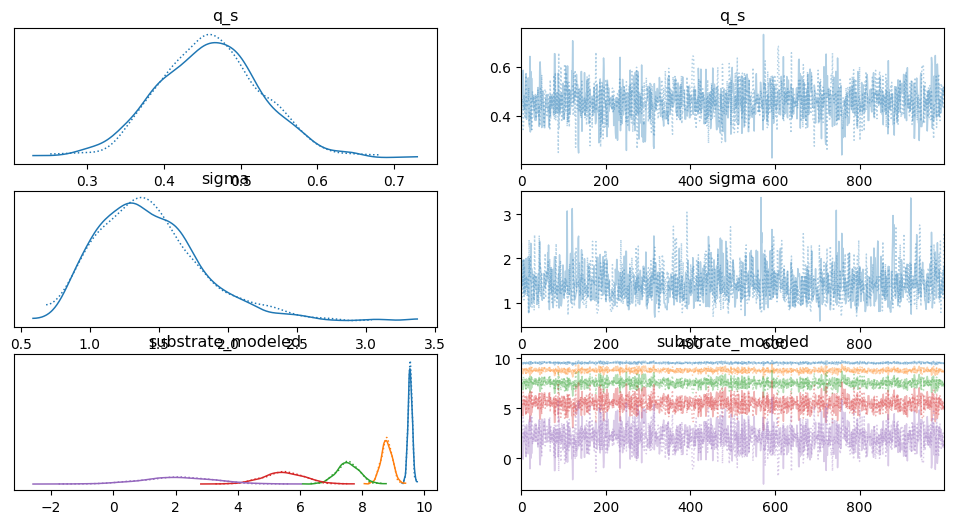

KeyError: 'q_s'

In [6]:
import pymc as pm

# Simulated Data
time = np.array([0, 1, 2, 3, 4, 5])
substrate_observed = np.array([10, 8.5, 7.2, 5.8, 4.6, 3.5])  # Sparse and noisy
biomass = np.exp(0.5 * time)  # Assumed exponential growth

# Bayesian Model
with pm.Model() as model:
    # Priors
    q_s = pm.Normal("q_s", mu=1, sigma=1)  # Prior for uptake rate
    sigma = pm.HalfNormal("sigma", sigma=1)  # Noise in measurements

    # Model: dS/dt = -q_s * X
    substrate_modeled = pm.Deterministic("substrate_modeled", 
                                         10 - q_s * np.cumsum(biomass[:-1] * np.diff(time)))

    # Likelihood
    substrate_likelihood = pm.Normal("substrate_obs", 
                                     mu=substrate_modeled, 
                                     sigma=sigma, 
                                     observed=substrate_observed[1:])

    # Sampling
    trace = pm.sample(1000, tune=1000, cores=2)

# Posterior Analysis
pm.plot_trace(trace)
plt.show()

# Estimated uptake rate
q_s_mean = trace["q_s"].mean()
print(f"Estimated uptake rate (q_s): {q_s_mean:.3f} mmol/g/hr")

In [20]:
keys = list(data.keys())
dat = data[keys[0]]

b_t = dat["mean"]["b_t"]
b_t = np.concatenate([[0], b_t])
g_t = dat["mean"]["g_t"].values
g_s = dat["mean"]["g_s"]
b_s = dat["mean"]["b_s"]
b_s = np.concatenate([[b_s[0]], b_s])

with pm.Model() as model:
    # Priors
    q_s = pm.Normal("q_s", mu=1, sigma=1)
    sigma = pm.HalfNormal("sigma", sigma=1)

    # Model: dS/dt = -q_s * X
    substrate_modeled = pm.Deterministic("substrate_modeled",
                                         g_s[0] - q_s * np.cumsum(b_s[:-1] * np.diff(b_t)))
    
    # Likelihood
    substrate_likelihood = pm.Normal("substrate_obs",
                                     mu=substrate_modeled,
                                     sigma=sigma,
                                     observed=g_s[1:])
    
    # Sampling
    trace = pm.sample(1000, tune=1000, cores=2)

# Posterior Analysis
pm.plot_trace(trace)
plt.show()

ValueError: Incompatible Elemwise input shapes [(8,), (56,)]

In [23]:
10 - 2 * np.cumsum(b_s[:-1] * np.diff(b_t))

array([9.9998925 , 9.999785  , 9.999226  , 9.99854875, 9.9978715 ,
       9.99738775, 9.996904  , 9.99642025, 9.99613   , 9.99583975,
       9.9955495 , 9.995055  , 9.994238  , 9.9933565 , 9.99242125,
       9.9910775 , 9.98960475, 9.98786325, 9.985939  , 9.98433725,
       9.98227325, 9.97975775, 9.97659725, 9.97311425, 9.96866375,
       9.96324575, 9.95686025, 9.94912025, 9.94015475, 9.92996375,
       9.91816025, 9.90480875, 9.89003825, 9.87320375, 9.85449875,
       9.83379425, 9.81070325, 9.78503225, 9.75684575, 9.72556325,
       9.69112025, 9.65332325, 9.61139825, 9.56540975, 9.51522875,
       9.45988775, 9.39945125, 9.33327425, 9.26103425, 9.18240875,
       9.09946175, 9.01599875, 8.93272925, 8.85087875, 8.76980225,
       8.68962875])

In [29]:
trace.posterior["q_s"].mean().values

array(0.45978266)

Estimated uptake rate (q_s): 0.456 mmol/g/hr


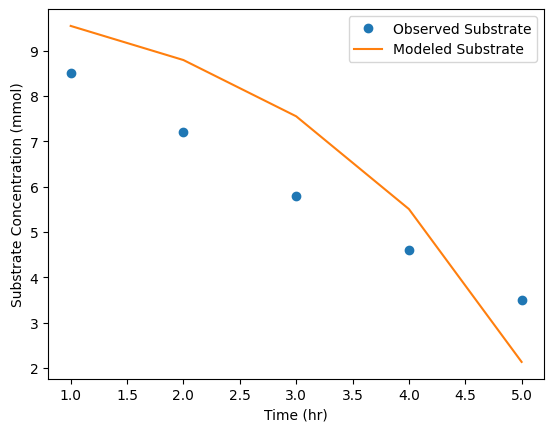

In [16]:
from scipy.optimize import minimize

# Simulated Data
time = np.array([0, 1, 2, 3, 4, 5])
substrate_observed = np.array([10, 8.5, 7.2, 5.8, 4.6, 3.5])  # Sparse and noisy
biomass = np.exp(0.5 * time)  # Assumed exponential growth

# Define Objective Function with Regularization
def objective(q_s, time, substrate_observed, biomass, lambda_reg=0.1):
    # Modeled substrate depletion
    substrate_modeled = 10 - q_s * np.cumsum(biomass[:-1] * np.diff(time))
    
    # Residuals
    residuals = substrate_observed[1:] - substrate_modeled
    
    # L2 Regularization
    regularization = lambda_reg * q_s**2
    
    return np.sum(residuals**2) + regularization

# Minimize the Objective Function
result = minimize(objective, x0=[0.1], args=(time, substrate_observed, biomass), bounds=[(0, None)])

# Extract fitted uptake rate
q_s_fit = result.x[0]
print(f"Estimated uptake rate (q_s): {q_s_fit:.3f} mmol/g/hr")

# Plot Results
substrate_modeled = 10 - q_s_fit * np.cumsum(biomass[:-1] * np.diff(time))
plt.plot(time[1:], substrate_observed[1:], 'o', label="Observed Substrate")
plt.plot(time[1:], substrate_modeled, '-', label="Modeled Substrate")
plt.xlabel("Time (hr)")
plt.ylabel("Substrate Concentration (mmol)")
plt.legend()
plt.show()